# Using Data Structures Effectively 

## pandas DataFrames

### DataFrame functionality

In [1]:
import pandas as pd

In [2]:
usa_data = pd.Series(
    [13.33, 14.02, 14.02, 14.25], index=["2000", "2001", "2002", "2003"]
)

In [3]:
usa_data

2000    13.33
2001    14.02
2002    14.02
2003    14.25
dtype: float64

In [7]:
nepal_data = pd.Series([9.02, 9.01, 8.84, 8.84], index=["2000", "2001", "2002", "2003"])

In [8]:
df = pd.DataFrame({"USA": usa_data, "Nepal": nepal_data})

In [9]:
df

,USA,Nepal
2000,13.33,9.02
2001,14.02,9.01
2002,14.02,8.84
2003,14.25,8.84


#### Effectively working with tabular data
Let’s walk through a few examples of what you can do easily with `pandas` that can be rather complicated without it:

- Quickly reading your data into a structured tabular form

- Quickly describe/summarize your data

- Quickly querying your dataset

- Quickly plotting your data

#### Example 1: Quickly reading your data into a structured tabular form

In [19]:
import pandas as pd

smallworld = pd.read_csv("../data/world-very-small.csv")
smallworld

,country,region,gdp_per_capita_2008
0,Brazil,S. America,10296
1,Germany,W. Europe,35613
2,Mexico,N. America,14495
3,Mozambique,Africa,855
4,Russia,C&E Europe,16139
5,Ukraine,C&E Europe,7271


#### Example 2: Quickly describe / summarize your data

In [20]:
smallworld.describe()

,gdp_per_capita_2008
count,6.000000
mean,14111.500000
std,11863.031683
min,855.000000
25%,8027.250000
50%,12395.500000
75%,15728.000000
max,35613.000000


#### Example 3: Quickly querying your data

In [22]:
smallworld.loc[smallworld.gdp_per_capita_2008 < 10000]

,country,region,gdp_per_capita_2008
3,Mozambique,Africa,855
5,Ukraine,C&E Europe,7271


#### Example 4: Quickly plotting your data

<Axes: xlabel='country'>

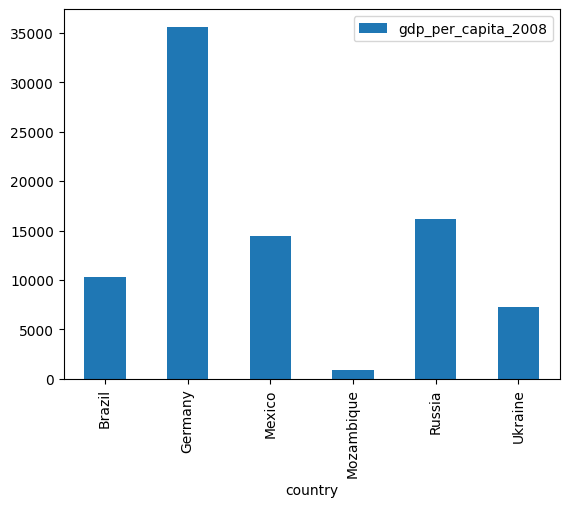

In [23]:
smallworld.plot.bar(x="country", y="gdp_per_capita_2008")

### Drawbacks of pandas
Despite its many advantages, and as with all tools, pandas also has its drawbacks. First of all, the syntax of pandas is a bit different from base Python and numpy, making it a bit challenging to learn. The other drawback is that pandas is particularly well-designed for 1D series/arrays and 2D matrices. It’s not suitable for handling 3D or N-D matrices (where N > 3). In such cases, there are two main options. The first is to simply revert to our trustworthy friend numpy — it’s extremely flexible, powerful, and you already know how to use it! The second option is to use the xarray package, which is to higher-dimensional numpy arrays what pandas is to 1 or 2D numpy arrays 

### DataFrame performance

In [26]:
df = pd.read_excel("../data/SG_GEN_PARL.xlsx")
df = df.drop(
    [
        "Goal",
        "Target",
        "Indicator",
        "SeriesCode",
        "SeriesDescription",
        "GeoAreaCode",
        "Reporting Type",
        "Sex",
        "Units",
    ],
    axis=1,
)
df = df.set_index("GeoAreaName").transpose()

In [27]:
df

GeoAreaName,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
2000,NaN,5.16,3.16,7.14,15.45,5.26,28.02,3.05,22.45,26.78,...,22.18,13.33,12.12,6.80,0.00,12.14,26.00,0.66,10.13,14.00
2001,NaN,5.16,3.42,7.14,15.45,5.26,26.46,3.05,22.97,26.78,...,22.18,14.02,12.12,7.20,0.00,9.70,26.00,0.66,10.13,9.33
2002,NaN,5.71,3.42,14.29,15.45,5.26,30.74,3.05,25.33,26.78,...,22.26,14.02,12.12,7.20,0.00,9.70,26.00,0.67,12.03,10.00
2003,NaN,5.71,6.17,14.29,15.45,5.26,30.74,3.05,25.33,33.88,...,22.26,14.25,12.12,7.20,1.92,9.70,27.31,0.67,12.03,10.00
2004,NaN,5.71,6.17,14.29,15.45,5.26,30.74,4.58,25.33,33.88,...,21.36,14.25,12.12,7.20,1.92,9.70,27.31,0.33,12.03,10.00
2005,NaN,6.43,6.17,14.29,15.00,10.53,33.73,5.34,24.67,33.88,...,21.36,14.94,12.12,17.50,3.85,9.70,27.31,0.33,12.03,10.00
2006,27.31,7.14,6.17,28.57,15.00,10.53,36.19,5.34,24.67,33.88,...,30.41,15.17,11.11,17.50,3.85,17.37,27.31,0.33,12.66,16.00
2007,27.31,7.14,6.17,28.57,15.00,10.53,35.02,5.34,24.67,32.24,...,30.41,16.32,11.11,17.50,3.85,17.96,27.31,0.33,14.65,16.67
2008,27.69,7.14,7.71,25.00,15.00,10.53,40.00,9.16,26.67,32.79,...,30.41,16.78,12.12,17.50,3.85,18.56,25.76,0.33,15.19,16.00
2009,27.69,7.14,7.71,25.00,37.27,10.53,40.00,8.40,26.67,27.32,...,30.41,17.01,12.12,17.50,3.85,18.56,25.76,0.33,15.19,15.24


In [28]:
%%timeit
df["Nepal_fraction"] = df["Nepal"] / 100

121 µs ± 6.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In addition to the vectorized operations available in NumPy, pandas includes vectorized string operations. These include `lower`, `strip`, `split`, and so on. It’s faster to use `df['column_name'].str.lower()` than the regular Python `.lower()` method.


If what you’re trying to do isn’t available as an inbuilt function, you can use apply with any function you define (more about apply in the next chapter). As you can see below, it adds some overhead to a calculation


In [29]:
%%timeit
df["Nepal_fraction"] = df["Nepal"].apply(lambda x: x / 100)

161 µs ± 49.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


If you want to perform some operation on every row of your DataFrame, it might seem intuitive to iterate through all the rows. And pandas provides the `iterrows` method for this. 

But as you can see below, this is much slower than using a vectorized operation or using apply, so it’s something you should avoid

In [14]:
%%timeit
df["Nepal_fraction"] = [row["Nepal"] / 100 for index, row in df.iterrows()]

842 µs ± 5.94 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### The `object` Data Type
In our previous readings, we introduced the idea that not only can DataFrames and Series hold any of the numeric data types we’ve come to know and love from numpy — like float64 or int64 — but that they can also hold arbitrary Python objects in an object-type Series.

The object type Series gives pandas incredible flexibility as it allows any type of data to be stored in a table. The most common use of the object data type is to store text — for example, names, addresses, written answers, etc. — but the flexibility can also be used for applications like geospatial analysis, in which a single row of a DataFrame may represent a single country, the columns may represent features of the country (name, income, population), and the last column stores geometric Python objects that describe the shape and location of the country.

But this flexibility comes at a cost - performance and memory efficiency. 


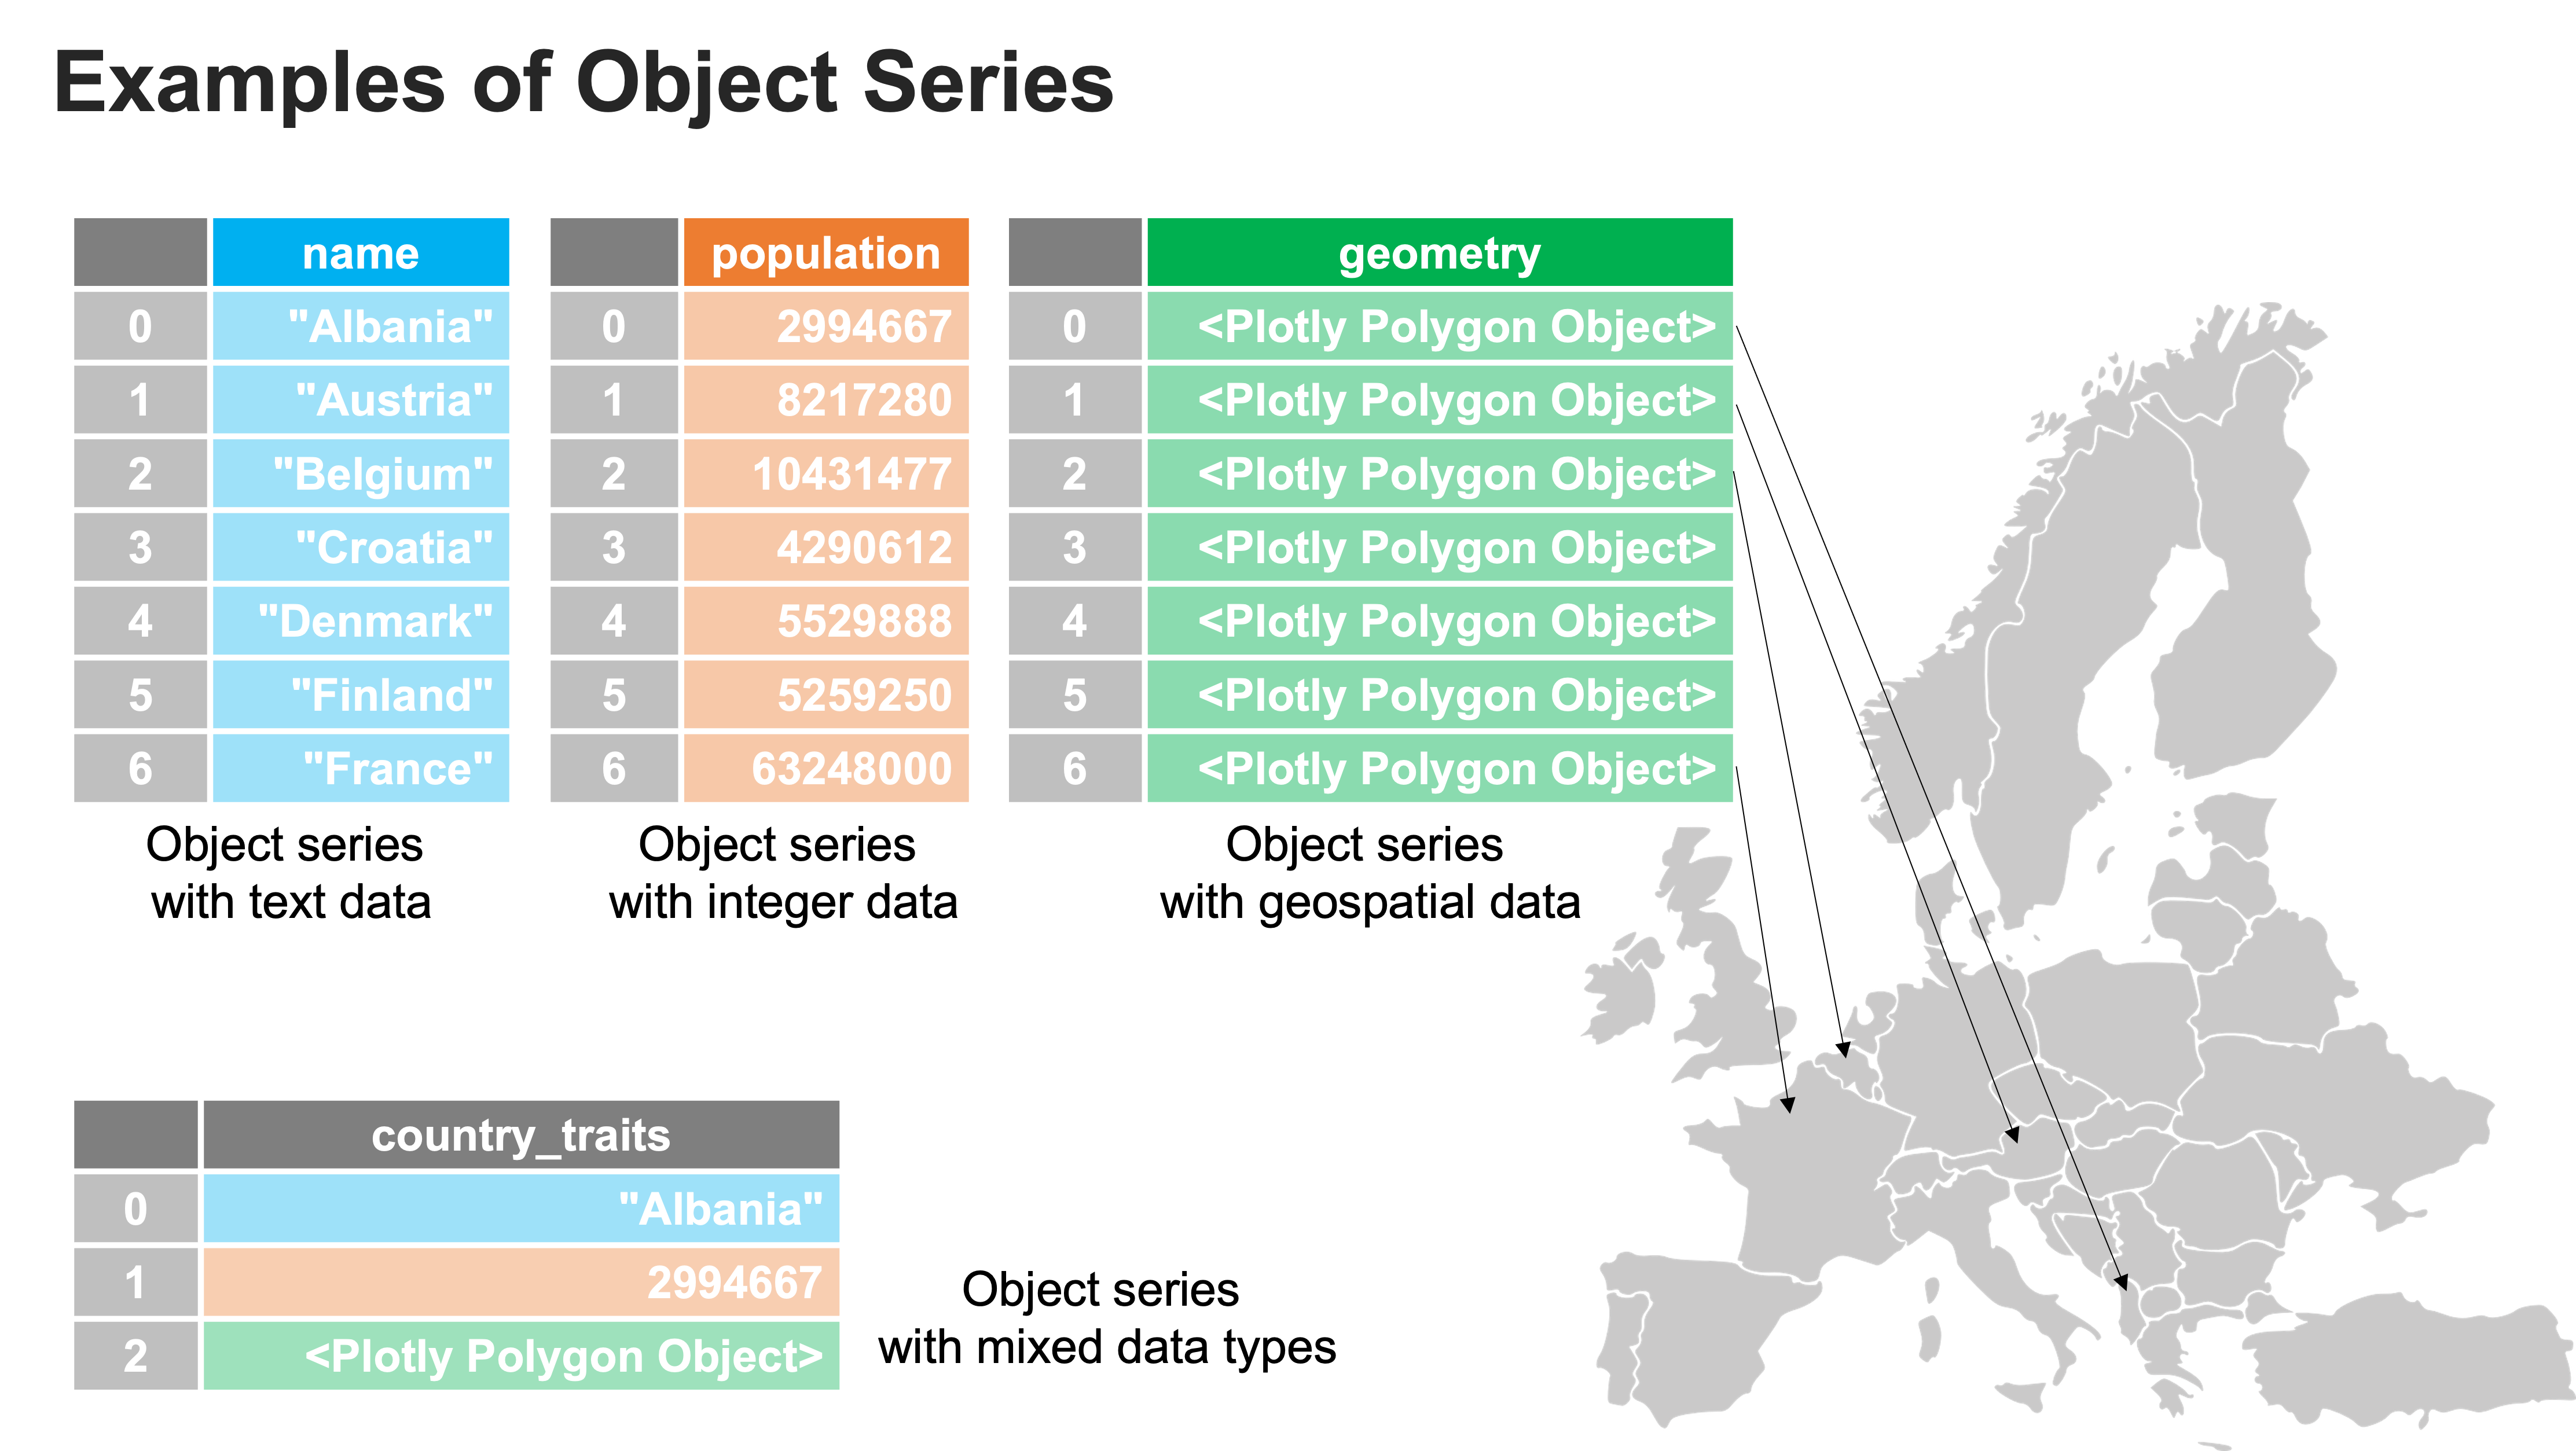

#### The object Performance Penalty
To understand why object Series are slow, it helps to first discuss why numeric Series (and numeric numpy arrays) are fast. When you work with a numeric pandas Series or numpy array, all of the entries in those arrays live in the same place in memory (in your computer’s RAM). This is possible because all those integers (or all those floating point numbers) are written with the same number of 0s and 1s. In an int64 Series, for example, every integer is represented by 64 1s and 0s. This makes it easy for the computer to lay them out sequentially. Moreover, it makes it possible for the computer to find specific entries quickly, since it knows that the third integer in the Series will start 64 * 2 spots from the start of the Series and end 64 spots later.

But an object Series is a little different. Python objects vary in size — some may only take up 128 0s and 1s, while others may require thousands — and so the actual data in an object Series can’t be laid down in a nice regularly spaced sequence. Instead, every entry in an object Series gets put in a different location in your computer’s memory (RAM), and only the address of that information is placed in a nice organized Series. These addresses are all the same size, and so the addresses can be organized in a regular manner, even if the actual content you want to store is irregular.

The cost of this arrangement is that if you ask for the second entry of an object Series (e.g., my_series.iloc[1]), you’re computer has first go to the second location in the array, read the address stored there, then go to that address to find the actual content you want. And those added steps waste time.

The other problem with object Series is that because they can store anything, Python doesn’t know before it looks up an entry whether it will find a string, an integer, or a Python set. As a result, when it sees code like:

my_array * 2
Python can’t be sure what is meant by * — it could mean “do integer multiplication” (if a given entry in my_array is an integer), but it might also mean “double up the list you find” (if the entry is a Python list)!

Indeed we can see this if we make a numpy object array full of ints and compare it to a numpy integer array. The both have the same content, but they are organized in memory differently

In [30]:
import pandas as pd
import numpy as np

object_numbers = pd.Series(np.arange(1000000), dtype="object")
numbers = pd.Series(np.arange(1000000), dtype="int64")

In [32]:
%%timeit 
object_numbers * 2

37.2 ms ± 4.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit
numbers * 2

4.2 ms ± 660 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


See? Same operation (doubling each entry of arrays with the integers from 0 to 1,000,000), but the object array operation is ~20x slower.

So yes, `object` dtypes are absolutely wonderful and introduce unbelievable flexibility to pandas; but remember there is a cost to using them, so stick to numeric data types when possible!